# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
from scipy.stats import linregress


# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Search Settings, API keys
api_key ="924783bda048569443e49dd6a03e5591"

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of City data
city_data = []


In [7]:
# OpenWeatherMap API Key
api_key = "924783bda048569443e49dd6a03e5591"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        


Processing Record 32 of Set 10 | yirol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yirol
City not found. Skipping...
Processing Record 33 of Set 10 | dana point
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dana%20point
Processing Record 34 of Set 10 | telde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=telde
Processing Record 35 of Set 10 | jiwani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=jiwani
Processing Record 36 of Set 10 | jiuquan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=jiuquan
Processing Record 37 of Set 10 | cardoso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cardoso
Processing Record 38 of Set 10 | ajuchitlan
http://api.openwe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
city_data_df = pd.DataFrame(city_data)

In [30]:
# Extract the data from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Convert into CSV
city_data_df.to_csv(output_data_file, index_label = "City_Data")

# Record count
city_data_df.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [31]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,40,EC,1615763509,74,-0.7393,-90.3518,82.40,9.22
1,dikson,100,RU,1615763801,99,73.5069,80.5464,-25.73,11.36
2,georgetown,20,MY,1615763625,83,5.4112,100.3354,78.80,5.75
3,severo-kurilsk,0,RU,1615763802,77,50.6789,156.1250,33.57,4.36
4,ongwediva,94,NA,1615763803,69,-17.7833,15.7667,77.00,8.05


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

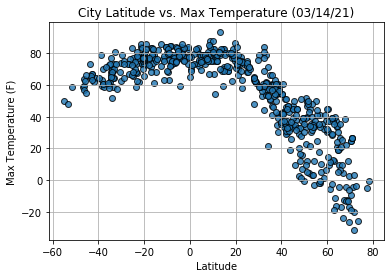

In [32]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

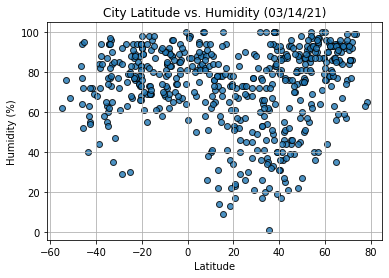

In [33]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

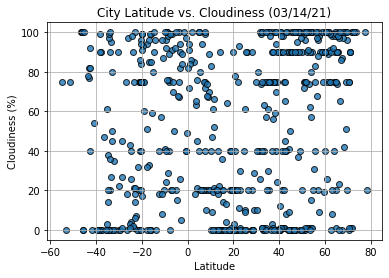

In [34]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

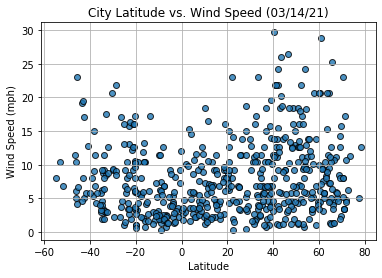

In [35]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [40]:
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemisphere.reset_index(inplace = True)

southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemisphere.reset_index(inplace = True)

In [60]:
def LinearRegression(xdata, ydata, xlabel,ylabel,labelpos, ifig):
    (slope, intercept, rvalue, pvalue,stderr) = linregress(xdata, ydata)
    print(f"The r-squared value is: {rvalue}")
    regress_value = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xdata, ydata)
    plt.plot(xdata, regress_value, "r-")
    plt.annotate(line_eq, labelpos, color = "blue")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: -0.871676067418518


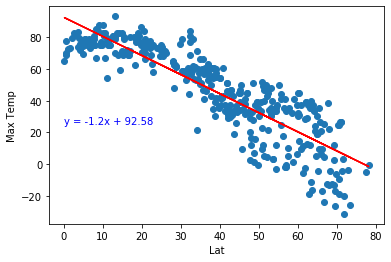

In [63]:
xlabel = "Lat"
ylabel = "Max Temp"
labelpos = (0, 25)
LinearRegression(northern_hemisphere[xlbl],northern_hemisphere[ylabel],xlabel,ylabel,labelpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.6738852305896833


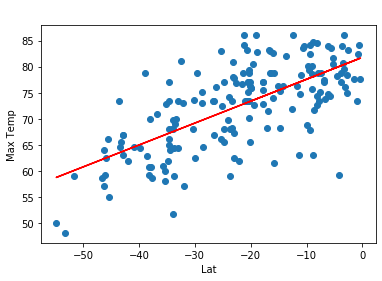

In [66]:
xlabel = "Lat"
ylabel = "Max Temp"
labelpos = (-55, 90)
LinearRegression(southern_hemisphere[xlbl],southern_hemisphere[ylabel],xlabel,ylabel,labelpos,6)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.22685768288849031


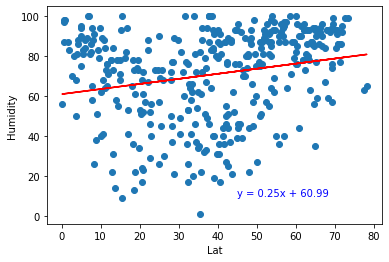

In [67]:
xlabel = "Lat"
ylabel = "Humidity"
labelpos = (45, 10)
LinearRegression(northern_hemisphere[xlabel], northern_hemisphere[ylabel], xlabel, ylabel, labelpos, 7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.2516930950209875


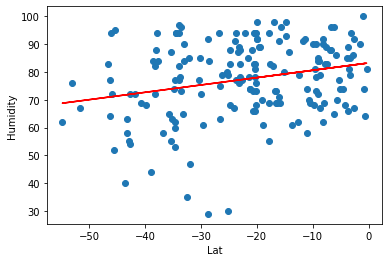

In [68]:
xlabel = "Lat"
ylabel = "Humidity"
labelpos = (-55, 15)
LinearRegression(southern_hemisphere[xlabel], southern_hemisphere[ylabel], xlabel, ylabel, labelpos, 8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.2764159150947721


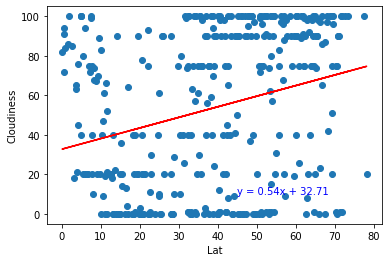

In [69]:
xlabel = "Lat"
ylabel = "Cloudiness"
labelpos = (45, 10)
LinearRegression(northern_hemisphere[xlabel], northern_hemisphere[ylabel], xlabel, ylabel, labelpos, 9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.17276438949621245


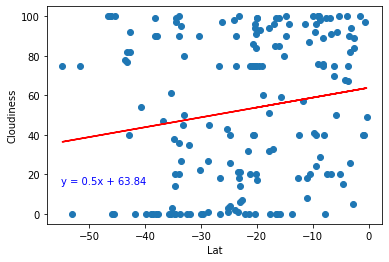

In [70]:
xlabel = "Lat"
ylabel = "Cloudiness"
labelpos = (-55, 15)
LinearRegression(southern_hemisphere[xlabel], southern_hemisphere[ylabel], xlabel, ylabel, labelpos, 10)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.17170324678417215


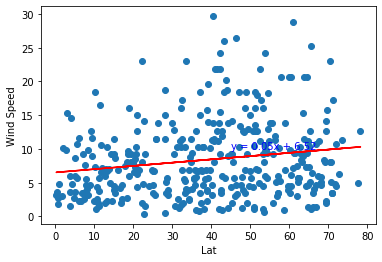

In [71]:
xlabel = "Lat"
ylabel = "Wind Speed"
labelpos = (45, 10)
LinearRegression(northern_hemisphere[xlabel], northern_hemisphere[ylabel], xlabel, ylabel, labelpos, 11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: -0.30774361941648054


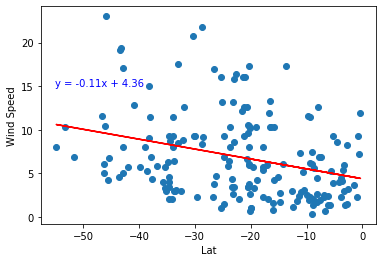

In [72]:
xlabel = "Lat"
ylabel = "Wind Speed"
labelpos = (-55, 15)
LinearRegression(southern_hemisphere[xlabel], southern_hemisphere[ylabel], xlabel, ylabel, labelpos, 12)